# Assignment 7: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
###### xArray ######

# DataArray: data structure with Single multi-dimensional variable and coordinates
    # 4 Attributes:
        # Values: numpy.ndarray holds array values
        # dims: dimension names for each axis ~"(x, y, z)"
        # coords:  a dict-like container of arrays (coordinates) that label each point 
        # attrs: an OrderedDict to hold arbitrary metadata (attributes)

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from statistics import mean
from numpy import mean

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 6)


Next, download the NetCDF file using wget.

In [2]:

! wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

tc = ! wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

#tc


--2021-11-18 01:14:01--  http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving ldeo.columbia.edu (ldeo.columbia.edu)... 129.236.19.40
Connecting to ldeo.columbia.edu (ldeo.columbia.edu)|129.236.19.40|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc [following]
--2021-11-18 01:14:01--  https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 736656452 (703M) [application/x-netcdf]
Saving to: ‘CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc.4’

CERES_EBAF-TOA_Edit 100%[===================>] 702.53M  97.6MB/s    in 7.4s    

2021-11-18 01:14:13 (94.5 MB/s) - ‘CERES_EBAF-TOA_Edition4.

In [3]:

import pooch
fname = pooch.retrieve(
    'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc',
    known_hash='a876cc7106e7dcb1344fbec5dcd7510e5cd947e62049a8cbc188ad05ffe00345'
)
print(fname)


/home/jovyan/.cache/pooch/8e18cca34f0b893a1829cf86ad4b7c49-CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


## 1.1) Open the dataset and display its contents 


In [4]:

ds = xr.open_dataset(fname)
ds


<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [5]:

# import netCDF4
# from netCDF4 import Dataset  

# #xarray.open_dataset(tc)

# #ds = xr.Dataset()

# #ds.to_netcdf("http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc")

# ds_disk = xr.open_dataset("http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc", decode_times = False,)

# ds_disk

# # # npLDEO = np.loadtxt("http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc")

# # #files = "http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc"

# # ld = "http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc"
# # ncds = netCDF4.Dataset(ld)
# # ds = xr.open_dataset(ld)

# # display(ds)


## 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [6]:

#ds.variables
#ds.info()
#ds.head()

print("Variable Long Names: \n\n",
      
"1: ",ds.toa_sw_all_mon.long_name, "\n",
"2: ",ds.toa_lw_all_mon.long_name,"\n",
"3: ",ds.toa_net_all_mon.long_name,"\n",

"4: ",ds.toa_sw_clr_mon.long_name,"\n",
"5: ",ds.toa_lw_clr_mon.long_name,"\n",
"6: ",ds.toa_net_clr_mon.long_name,"\n",

"7: ",ds.toa_cre_sw_mon.long_name,"\n",
"8: ",ds.toa_cre_lw_mon.long_name,"\n",
"9: ",ds.toa_cre_net_mon.long_name,"\n",
      
"10: ",ds.solar_mon.long_name,"\n",
      
"11: ",ds.cldarea_total_daynight_mon.long_name,"\n",
"12: ",ds.cldpress_total_daynight_mon.long_name,"\n",
"13: ",ds.cldtemp_total_daynight_mon.long_name,"\n",
"14: ",ds.cldtau_total_day_mon.long_name)


Variable Long Names: 

 1:  Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions 
 2:  Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions 
 3:  Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions 
 4:  Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions 
 5:  Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions 
 6:  Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions 
 7:  Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means 
 8:  Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means 
 9:  Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means 
 10:  Incoming Solar Flux, Monthly Means 
 11:  Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions 
 12:  Cloud Effective Pressure, Monthly Means, Daytime-and-Nighttime conditions 
 13:  Cloud Effective Temperature, Monthly Means, Daytime-and-Nighttime conditi

## 2.1) Calculate the time-mean of the entire dataset

In [7]:

#ds


In [8]:

meanTime = ds.mean("time")

meanTime


<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821

In [9]:

# plt.style.use('dark_background')

# ds.time.mean().plot( lw = 2, 
#                     #figsize = (15, 7), 
#                     linestyle = "--", 
#                     edgecolor = "cyan",
#                     color = "k"
#                    )
# plt.title(label = "Time Mean");

# ##ds.solar_mon.mean(dim=(ds["lon"], ds["lat"])).plot()


## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

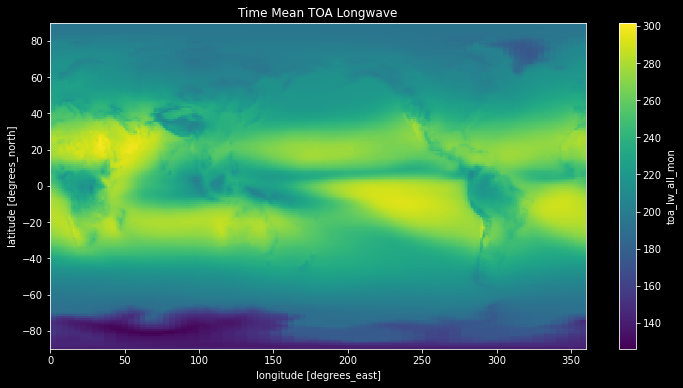

In [10]:

plt.style.use('dark_background')

toaLW = meanTime.toa_lw_all_mon.plot()#lw = 1, linestyle = "-.", edgecolor = "red");
plt.title(label = "Time Mean TOA Longwave");

#fig, ax = plt.subplots(tight_layout=True)
#hist = ax.plot(ds.time,ds.toa_lw_all_mon)

#ds.toa_lw_all_mon[1:203].mean().plot()

#ds.solar_mon.mean("time").isel().plot()

#ds.solar_mon.mean(dim=('lon', 'lat')).plot()

#ds.toa_net_all_mon[0].plot(vmin = -100, vmax = 100)


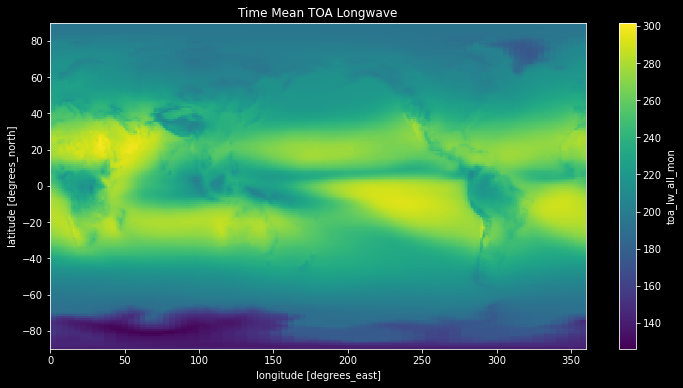

In [11]:
#*** USE VAR from 2.1

toaLWi = meanTime.toa_lw_all_mon.plot();
plt.title(label = "Time Mean TOA Longwave");


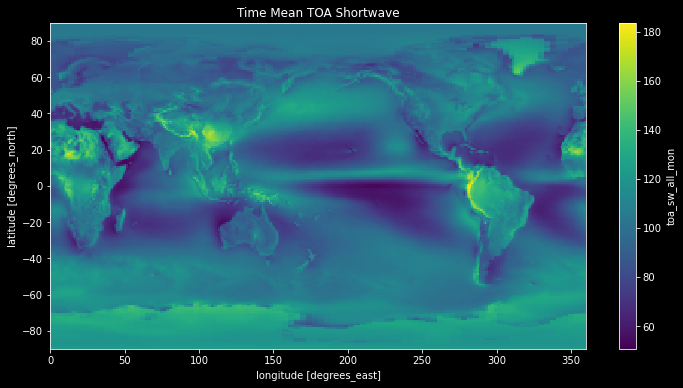

In [12]:

toaSWi = meanTime.toa_sw_all_mon.plot();
plt.title(label = "Time Mean TOA Shortwave");


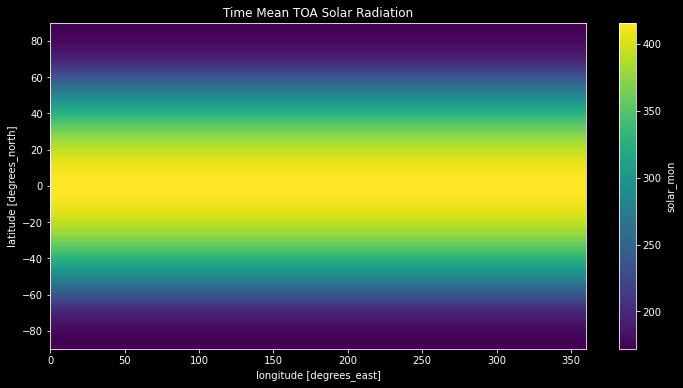

In [13]:

toaSol = meanTime.solar_mon.plot();
plt.title(label = "Time Mean TOA Solar Radiation");


## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions for each variable in order to get this to work.

In [14]:

#ds.toa_net_all_mon


In [15]:

# #meanTime.toa_sw_all_mon

# ds.toa_sw_all_mon


In [16]:

# ds.solar_mon


In [17]:

# ds.toa_lw_all_mon


In [18]:

flux = - ds["toa_sw_all_mon"] -  ds["toa_lw_all_mon"] + ds["solar_mon"] 

flux

#fluxI = sum(ds["toa_sw_all_mon"] + ds["toa_lw_all_mon"] + ds["solar_mon"])

#fluxI


<xarray.DataArray (time: 203, lat: 180, lon: 360)>
array([[[-126.32001 , -126.32001 , -126.32001 , ..., -126.32001 ,
         -126.32001 , -126.32001 ],
        [-124.29    , -124.29    , -124.29    , ..., -124.29    ,
         -124.29    , -124.29    ],
        [-123.47    , -123.47    , -123.47    , ..., -123.47    ,
         -123.47    , -123.47    ],
        ...,
        [-169.03    , -169.03    , -169.03    , ..., -169.03    ,
         -169.03    , -169.03    ],
        [-169.28    , -169.28    , -169.28    , ..., -169.28    ,
         -169.28    , -169.28    ],
        [-172.4     , -172.4     , -172.4     , ..., -172.4     ,
         -172.4     , -172.4     ]],

       [[-124.062004, -124.062004, -124.062004, ..., -124.062004,
         -124.062004, -124.062004],
        [-124.18    , -124.18    , -124.18    , ..., -124.18    ,
         -124.18    , -124.18    ],
        [-125.229   , -125.229   , -125.229   , ..., -125.229   ,
         -125.229   , -125.229   ],
...
        [-176.5     , -176.5     , -176.5     , ..., -176.5     ,
         -176.5     , -176.5     ],
        [-176.2     , -176.2     , -176.2     , ..., -176.2     ,
         -176.2     , -176.2     ],
        [-175.2     , -175.2     , -175.2     , ..., -175.2     ,
         -175.2     , -175.2     ]],

       [[ -34.899994,  -34.899994,  -34.899994, ...,  -34.899994,
          -34.899994,  -34.899994],
        [ -36.400024,  -36.400024,  -36.400024, ...,  -36.400024,
          -36.400024,  -36.400024],
        [ -35.099976,  -35.099976,  -35.099976, ...,  -35.099976,
          -35.099976,  -35.099976],
        ...,
        [-169.14801 , -169.14801 , -169.14801 , ..., -169.14801 ,
         -169.14801 , -169.14801 ],
        [-168.44899 , -168.44899 , -168.44899 , ..., -168.44899 ,
         -168.44899 , -168.44899 ],
        [-168.549   , -168.549   , -168.549   , ..., -168.549   ,
         -168.549   , -168.549   ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

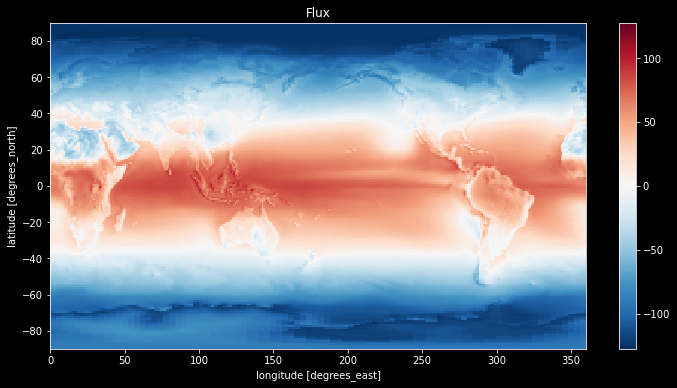

In [19]:

flux.mean("time").plot()
plt.title(label = "Flux");


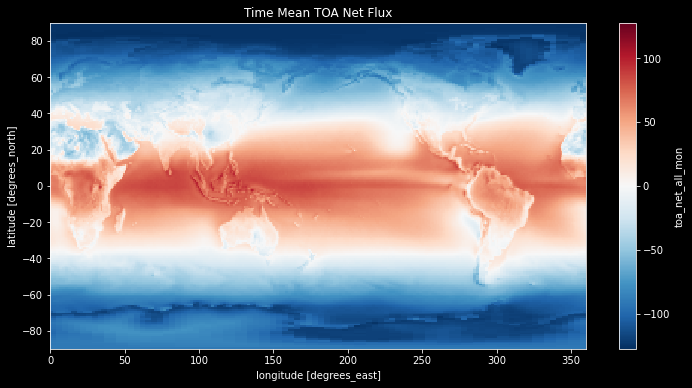

In [20]:

toaNet = ds.toa_net_all_mon.mean("time").plot();
plt.title(label = "Time Mean TOA Net Flux");


## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [21]:

#Global Av
globMean = meanTime.toa_net_all_mon.mean(("lon", "lat"))

globMean


<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729012, dtype=float32)

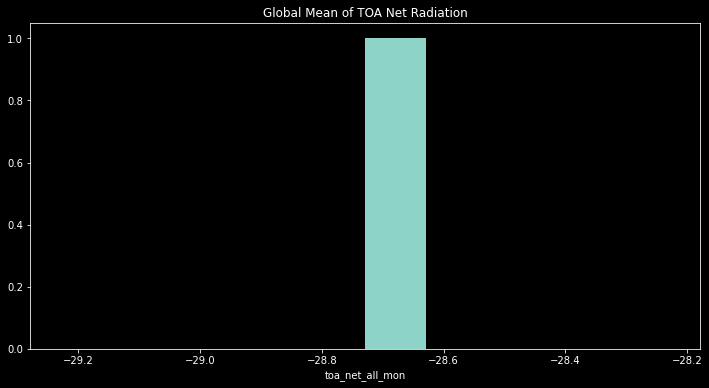

In [22]:

globMean.plot()
plt.title(label = "Global Mean of TOA Net Radiation");


The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

In [23]:
#weights = np.cos(ds.lat.deg2rad())


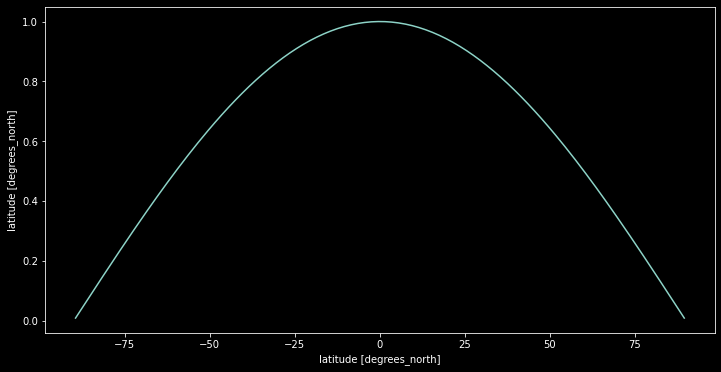

In [24]:
# \lamda = lat
#lat is in rad

# .radians

weights = np.cos(np.deg2rad(ds.lat))

#weightCheack = ds.weighted(weights).mean("lat")

#mean(cosL)

#print(weightCheck)

weights.plot()


## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [25]:

# xArray weighted reductions

globWeight = meanTime.toa_net_all_mon.weighted(weights = weights).mean()

globWeight


<xarray.DataArray 'toa_net_all_mon' ()>
array(0.87808636)

In [26]:

# print(weights.interp().values)
# print(weightCheck.interp().values)

# #####################################################

# lenNet1 = len(weights)  
# meanR1 = sum(weights) / lenNet1
# print("\n",meanR1);

# ########################################################

# lenNe1 = mean(weights)  
# print("\n",lenNe1);


# meanR1.plot()
# lenNe1.plot()
# plt.title(label = "Weight");



This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [27]:
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 43.85 43.85 ... 0.049
    toa_lw_all_mon               (time, lat, lon) float32 139.6 139.6 ... 168.5
    toa_net_all_mon              (time, lat, lon) float32 -126.4 ... -168.6
    toa_sw_clr_mon               (time, lat, lon) float32 64.47 64.47 ... 0.006
    toa_lw_clr_mon               (time, lat, lon) float32 136.6 136.6 ... 175.8
    toa_net_clr_mon              (time, lat, lon) float32 -143.9 ... -175.9
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 17.57 17.57 ... 7.292
    solar_mon                    (time, lat, lon) float32 57.13 57.13 ... 0.0
    cldarea_total_daynight_mon   (time, lat, lon) float32 40.0 40.0 ... 80.71
    cldpress_total_daynight_mon  (time, lat, lon) float32 540.9 540.9 ... 737.5
    cldtemp_total_daynight_mon   (time, lat, lon) float32 228.5 228.5 ... 238.7
    cldtau_total_day_mon         (time, lat, lon) float32 6.038 6.038 ... nan
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [28]:
globW = meanTime.weighted(weights = weights).mean()

globW

<xarray.Dataset>
Dimensions:                      ()
Data variables: (12/14)
    toa_sw_all_mon               float64 99.14
    toa_lw_all_mon               float64 240.3
    toa_net_all_mon              float64 0.8781
    toa_sw_clr_mon               float64 53.33
    toa_lw_clr_mon               float64 268.3
    toa_net_clr_mon              float64 18.67
    ...                           ...
    toa_cre_net_mon              float64 -17.8
    solar_mon                    float64 340.3
    cldarea_total_daynight_mon   float64 67.44
    cldpress_total_daynight_mon  float64 587.2
    cldtemp_total_daynight_mon   float64 257.2
    cldtau_total_day_mon         float64 4.665

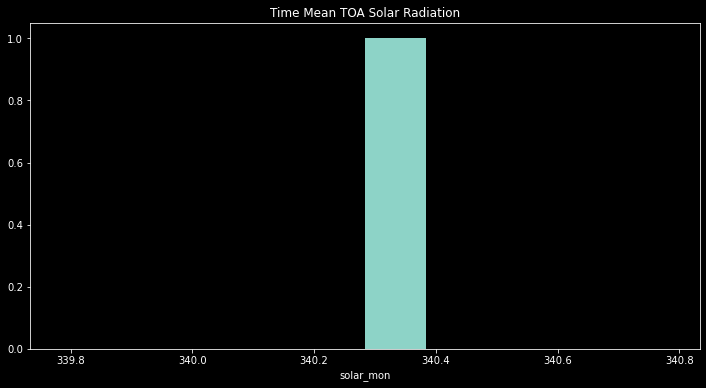

In [29]:

incSol = globW.solar_mon.plot();
plt.title(label = "Time Mean TOA Solar Radiation");


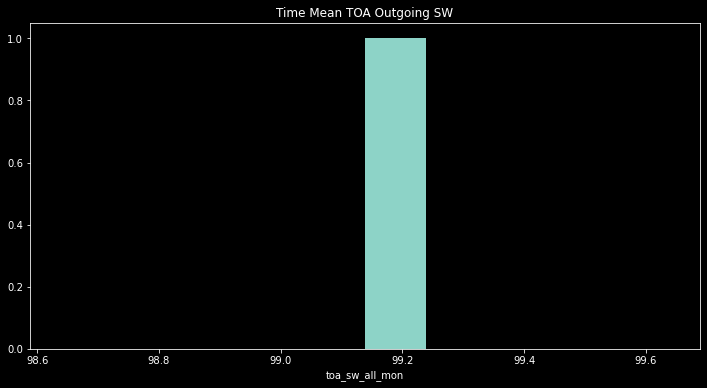

In [30]:

outSW = globW.toa_sw_all_mon.plot();
plt.title(label = "Time Mean TOA Outgoing SW");


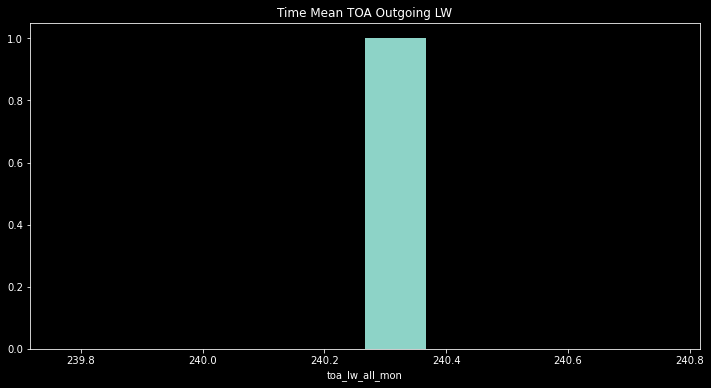

In [31]:

outLW = globW.toa_lw_all_mon.plot();
plt.title(label = "Time Mean TOA Outgoing LW");


We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [32]:

ρi = ds.lon
λi = ds.lat

ρii = meanTime.lon.mean("lon")
λii = meanTime.lat.mean("lat")

ρiii = meanTime.lon.weighted(weights = weights).mean()
λiii = meanTime.lat.weighted(weights = weights).mean()

R = 6371

def pixelArea(R, ρ, λ):
    dA = (R**2) * (np.cos(λ)) * (λ) * (ρ)
    return dA 


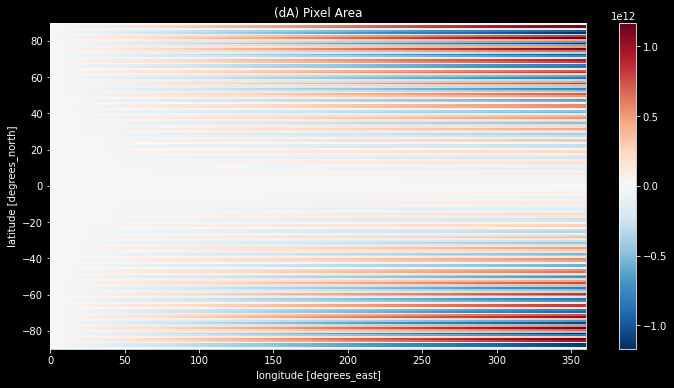

In [33]:

pixelArea(R, ρi, λi).plot();
plt.title(label = "(dA) Pixel Area");


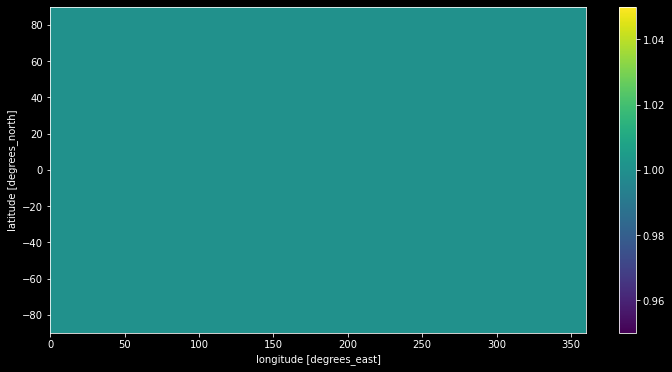

In [34]:

# globMean = meanTime.toa_net_all_mon.mean(("lon", "lat"))

oneL = xr.ones_like(pixelArea(R, ρi, λi))

oneL.plot();


Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

(array([8.484000e+03, 6.785200e+04, 2.272590e+05, 5.726600e+05,
        5.373692e+06, 6.026549e+06, 5.846700e+05, 2.280760e+05,
        5.913300e+04, 6.025000e+03]),
 array([-2.34007046e+14, -1.87235524e+14, -1.40464003e+14, -9.36924811e+13,
        -4.69209596e+13, -1.49438101e+11,  4.66220834e+13,  9.33936049e+13,
         1.40165126e+14,  1.86936648e+14,  2.33708169e+14]),
 <BarContainer object of 10 artists>)

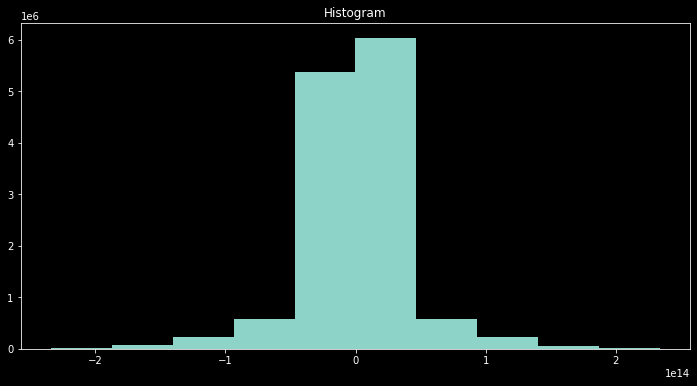

In [35]:

netRads = pixelArea(R, ρi, λi) * flux

netRads

netRads.plot()


## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

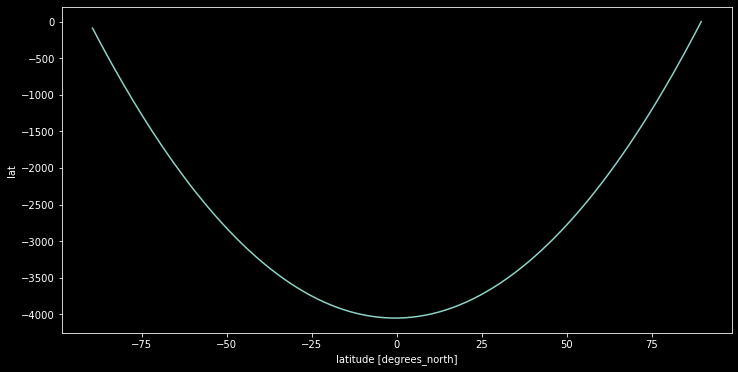

In [36]:

np.cumsum(ds.lat).plot()


You should get a curve that looks something like this: http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.html

## 5.1) Plot the time-mean cloud area fraction (day and night)

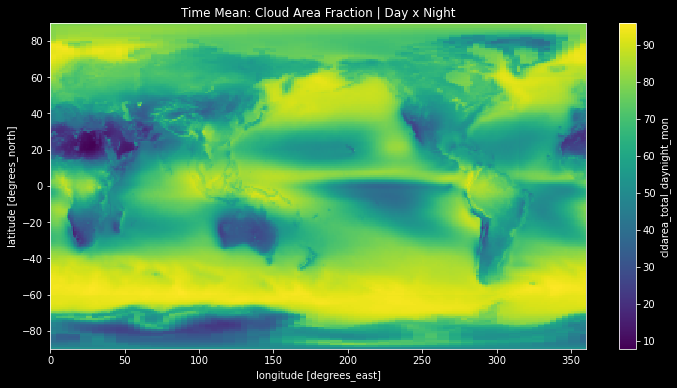

In [37]:

# ds

cloudFrac = ds.cldarea_total_daynight_mon.mean("time")

cloudFrac.plot()
plt.title(label = "Time Mean: Cloud Area Fraction | Day x Night");


## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [38]:

boolCloudArea = ds.cldarea_total_daynight_mon

lowCloud =  boolCloudArea <= 25
highCloud = boolCloudArea >= 75 


## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful. This may generate a warning regarding the mean of an empty slice which you can ignore.

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 17.44 17.44 ... nan nan
    toa_lw_all_mon               (lat, lon) float32 124.9 124.9 ... nan nan
    toa_net_all_mon              (lat, lon) float32 -119.5 -119.5 ... nan nan
    toa_sw_clr_mon               (lat, lon) float32 22.02 22.02 ... nan nan
    toa_lw_clr_mon               (lat, lon) float32 122.5 122.5 ... nan nan
    toa_net_clr_mon              (lat, lon) float32 -121.7 -121.7 ... nan nan
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 2.185 2.185 ... nan nan
    solar_mon                    (lat, lon) float32 22.77 22.77 ... nan nan
    cldarea_total_daynight_mon   (lat, lon) float32 21.4 21.4 21.4 ... nan nan
    cldpress_total_daynight_mon  (lat, lon) float32 545.9 545.9 ... nan nan
    cldtemp_total_daynight_mon   (lat, lon) float32 223.4 223.4 ... nan nan
    cldtau_total_day_mon         (lat, lon) float32 7.234 7.234 ... nan nan

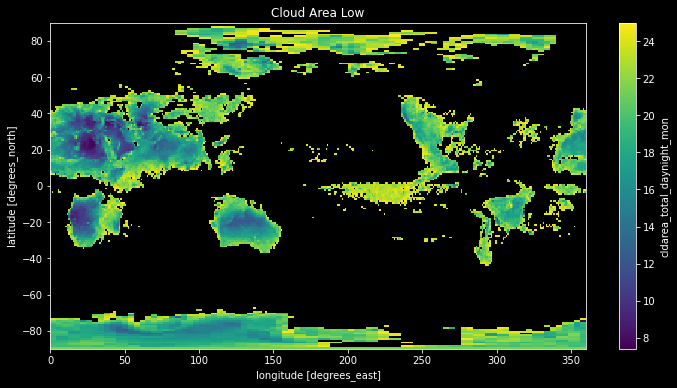

In [39]:

# ds.where(lowCloud).mean("time")

whereLow = ds.where(lowCloud).mean("time")

cloudARl = whereLow.cldarea_total_daynight_mon.plot()
plt.title(label = "Cloud Area Low");

whereLow


<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 250.1 250.1 ... 110.5 110.5
    toa_lw_all_mon               (lat, lon) float32 161.7 161.7 ... 198.6 198.6
    toa_net_all_mon              (lat, lon) float32 -61.92 -61.92 ... -125.6
    toa_sw_clr_mon               (lat, lon) float32 238.1 238.1 ... 91.66 91.65
    toa_lw_clr_mon               (lat, lon) float32 164.2 164.2 ... 206.3 206.3
    toa_net_clr_mon              (lat, lon) float32 -52.42 -52.42 ... -114.5
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -9.49 -9.49 ... -11.16
    solar_mon                    (lat, lon) float32 349.8 349.8 ... 183.5 183.5
    cldarea_total_daynight_mon   (lat, lon) float32 81.86 81.86 ... 86.17 86.17
    cldpress_total_daynight_mon  (lat, lon) float32 462.3 462.3 ... 769.5 769.5
    cldtemp_total_daynight_mon   (lat, lon) float32 230.1 230.1 ... 250.2 250.2
    cldtau_total_day_mon         (lat, lon) float32 2.976 2.976 ... 5.293 5.293

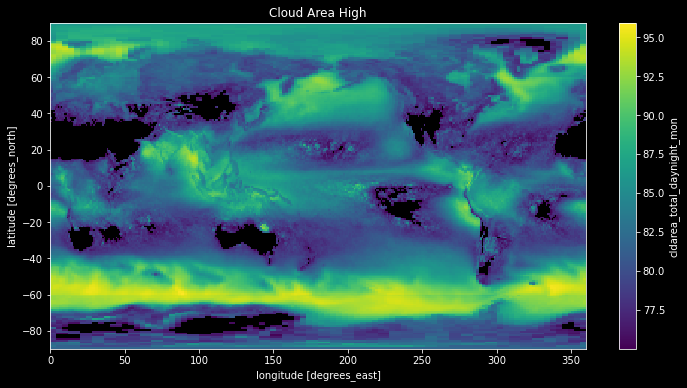

In [40]:

whereHigh = ds.where(highCloud).mean("time")

cloudARh = whereHigh.cldarea_total_daynight_mon.plot()
plt.title(label = "Cloud Area High")

whereHigh


## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

In [41]:
# ds

In [42]:

# globMean = meanTime.toa_net_all_mon.mean(("lon", "lat"))

# ############################################################

# whereHigh = ds.where(highCloud).mean("time")

# cloudARh = whereHigh.cldarea_total_daynight_mon.plot()

# ############################################################

# weights = np.cos(np.deg2rad(ds.lat))

# globWeight = meanTime.toa_net_all_mon.weighted(weights = weights).mean()

# #########################################################################


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([74.99432387, 75.09432387, 75.19432387, 75.29432387, 75.39432387,
        75.49432387, 75.59432387, 75.69432387, 75.79432387, 75.89432387,
        75.99432387]),
 <BarContainer object of 10 artists>)

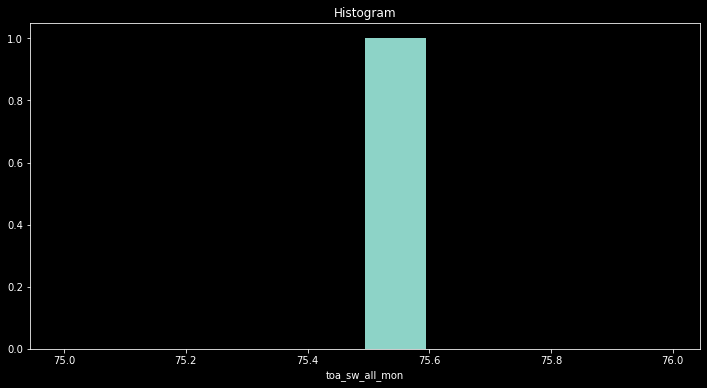

In [47]:

globalMeanSW = whereLow.toa_sw_all_mon.weighted(weights = weights).mean(("lon", "lat"))

globalMeanSW

globalMeanSW.plot()


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([270.3530266, 270.4530266, 270.5530266, 270.6530266, 270.7530266,
        270.8530266, 270.9530266, 271.0530266, 271.1530266, 271.2530266,
        271.3530266]),
 <BarContainer object of 10 artists>)

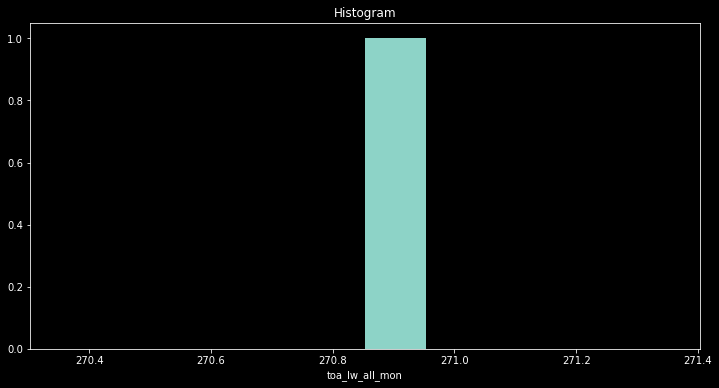

In [48]:

globalMeanLW = whereLow.toa_lw_all_mon.weighted(weights = weights).mean(("lon", "lat"))

globalMeanLW

globalMeanLW.plot()


What is the overall effect of clouds on shortwave and longwave radiation?

Clouds can eaither trap radiation or reflect it away depending on the density and height